# Reading and understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#reading the data
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#reading the shape of the data
lead_df.shape

(9240, 37)

In [4]:
#checking the details of the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking the datatypes 
lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
#reading data from the statistical point of view 
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking if data ahas any duplicate values
Prospect_ID = lead_df["Prospect ID"]
Prospect_ID[Prospect_ID.duplicated()].sum()

0

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b> NOTE: </b> There is <b> no duplicate data in the dataset.</b>


# Data cleaning 

In [8]:
# we are going to replace the "select" from the dataset that indicate no option selected with NaN
lead_df=lead_df.replace("Select",np.NaN)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#checking the null values 
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### Clearly, Prospect ID and Lead Number are just information to identify the individual leads, we dont this level of info and these can be dropped.

In [10]:
lead_df.drop(columns = ["Prospect ID", "Lead Number"],inplace=True)
lead_df.shape

(9240, 35)

##### There are a few columns which are after-sales columns. These would not be auto-provided to the model by the computer. Hence, lets drop these variables.

In [11]:
cols = ["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score",
       "Lead Quality","Tags"]
lead_df.drop(cols,axis=1,inplace=True)

In [12]:
lead_df.shape

(9240, 29)

##### Last Activity and Last Notable Activity, by definition, seem to be redundant. We can, thus, remove one of them

In [13]:
lead_df.drop(columns=["Last Activity"],inplace= True)

In [14]:
lead_df.shape

(9240, 28)

##### Missing value check

In [15]:
#checking the percentage of the missing value
nulls = round(100*(lead_df.isnull().sum()/len(lead_df)),2)
nulls

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
#Defining a function to visualize the missing data

def misses(x):
    nulls = ((x.isnull().sum()/len(x))*100).sort_values(ascending=False)
    per_miss = nulls.to_frame().reset_index()
    per_miss.rename(columns={'index':'Variables',0:'Missing_Percentage'},inplace=True)
    per_miss.sort_values("Missing_Percentage", ascending=False, inplace=True)
    to_plot = per_miss[per_miss.Missing_Percentage>0]
    plt.figure(figsize=[15,10])
    sns.barplot(data= to_plot, x = to_plot.Variables, y = to_plot.Missing_Percentage )
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

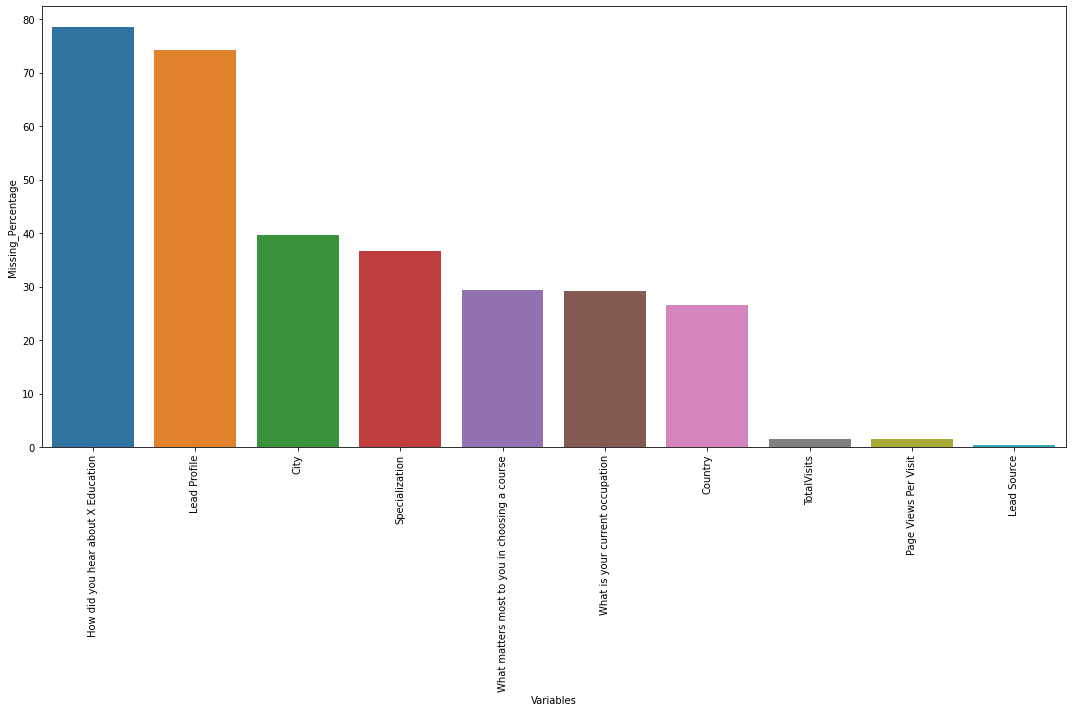

In [17]:
misses(lead_df)

In [18]:
#dropping the columns with high percentage of null values
#drop columns with null percebtage >60%
cols_nulls_GT60 = lead_df.columns[nulls>60]
lead_df=lead_df.drop(cols_nulls_GT60,axis=1)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,...,No,No,No,No,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [19]:
lead_df.shape

(9240, 26)

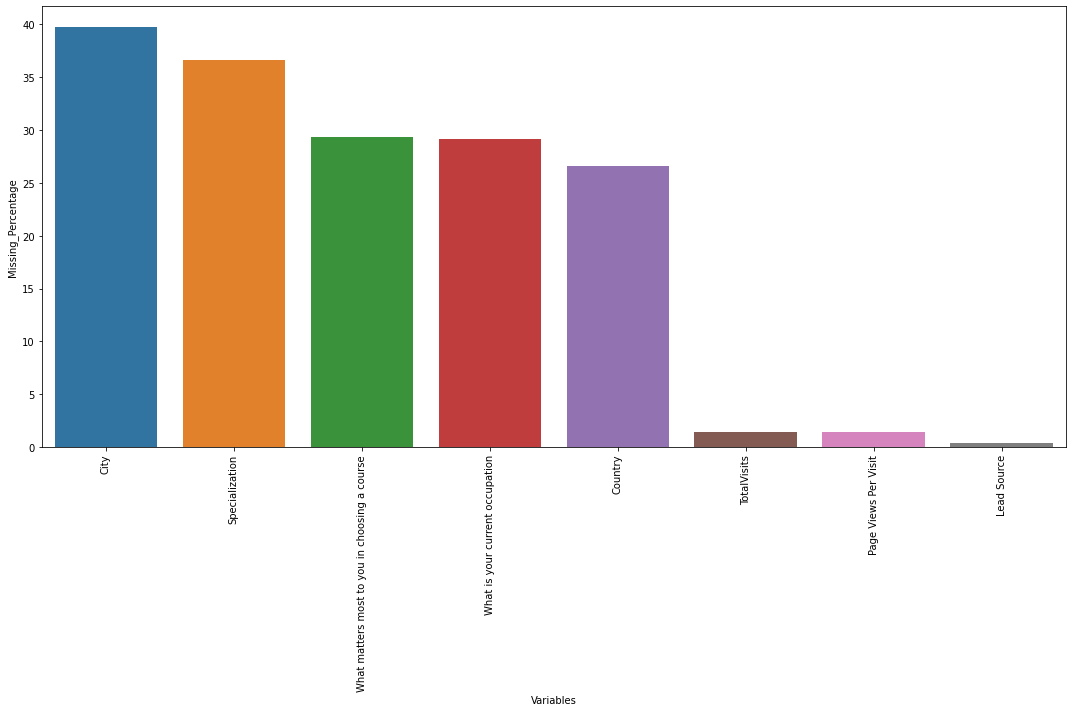

In [20]:
#Checking the missing values again
misses(lead_df)

In [21]:
#checking the percentage of the missing values now
nulls = round(100*(lead_df.isnull().sum()/len(lead_df)),2)
nulls

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

##### Let's analyze the categorical variables which have high missing value % and impute them with mode

In [22]:
#Creating a function to replace the values with mode
def rep_with_mode(x):
    md = lead_df[x].mode().reset_index()
    #replacing with the mode value
    lead_df[x]=lead_df[x].replace(np.NaN,md[0][0])
    print("Mode imputed. New counts of the variable: \n")
    print(lead_df[x].value_counts())
    print("\n\n Nulls in {0} post imputation".format(x))
    print(lead_df[x].isnull().sum())


##### Country variable (missing = 26.63%)

In [23]:
#checking country variable before imputing
lead_df["Country"].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
China                      2
Belgium                    2
Ghana                      2
Italy                      2
Bangladesh                 2
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Switzerland                1
Denmark                    1
Tanzania                   1
Vietnam                    1
Indonesia                  1
Russia        

In [24]:
#replace nulls with mode value
rep_with_mode("Country")

Mode imputed. New counts of the variable: 

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Philippines                2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Netherlands                2
Bangladesh                 2
China                      2
Belgium                    2
Uganda                     2
Malaysia                   1
Tanzania                   1
Switzerland                1
Liberia                    1
Indonesia                  1

##### "What is your current occupation" variable (missing = 29.11%)

In [25]:
#checking the variable before imputing
lead_df["What is your current occupation"].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#Imputing the missing with mode of the variable
rep_with_mode("What is your current occupation")

Mode imputed. New counts of the variable: 

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


 Nulls in What is your current occupation post imputation
0


##### "What matters most to you in choosing a course" variable (missing = 29.32%)

In [27]:
#checking the variable before imputing
lead_df["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
#Imputing the missing with mode of the variable
rep_with_mode("What matters most to you in choosing a course")

Mode imputed. New counts of the variable: 

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


 Nulls in What matters most to you in choosing a course post imputation
0


##### "City" variable (missing = 36.71%)

In [29]:
#checking the variable before imputing
lead_df["City"].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
#Imputing the missing with mode of the variable
rep_with_mode("City")

Mode imputed. New counts of the variable: 

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


 Nulls in City post imputation
0


##### Specialization variable (missing = 36.58%)

In [31]:
#checking the variable values
lead_df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

##### We cannot impute here with mode as Specialization could've been genuinely left as blank for leads that do not have any of the given specialization. As such, we should make a new category for these missing "Specializations" and mark them as "others"

In [32]:
#replacing nulls
lead_df["Specialization"]=lead_df["Specialization"].replace(np.NaN,"others")

In [33]:
#checking the null values if any
lead_df["Specialization"].isnull().sum()

0

In [34]:
#checking values in Specialization now
lead_df["Specialization"].value_counts()

others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [35]:
#Checking the percentage of null value after the above steps
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b> NOTE: </b> There are a few variables that have very small missing values (~1%) - <b> we can proceed to drop these null rows directly from the dataset

In [36]:
#drop the nan values from the rest of the rows
lead_df.dropna(inplace=True,axis=0)

In [37]:
#Checking the percentage of null value again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [38]:
#checking the shape of the dataset after dropping the null rows
lead_df.shape

(9074, 26)

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b> NOTE: </b>  <b> We, now, don't have any null values left. We can, hence, procees further in our analysis.

## Univariate analysis

<p style= "background:lightblue"> &#9654; <font color ="darkblue"> <b> NOTE: </b>  Converted is our target variable so we will check the other features keeping the target as hue to analyse the trend across the features

In [39]:
#Let us create a function to analyze the variable counts, keeping "Converted" as the hue.

def count_plt(x):
    plt.figure(figsize= (10,8))
    sns.countplot(data = lead_df, x = x, hue ="Converted")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

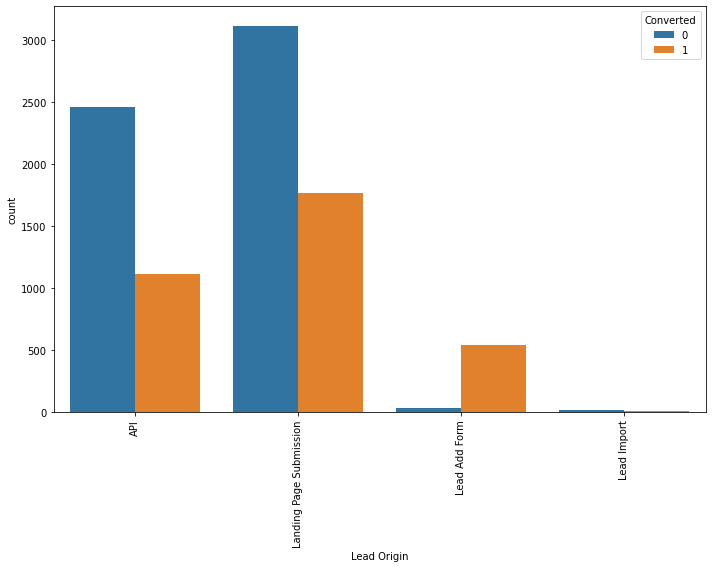

In [40]:
#visualizing Lead Origin
count_plt("Lead Origin")

##### Best conversions are coming from the  "Lead Add form"

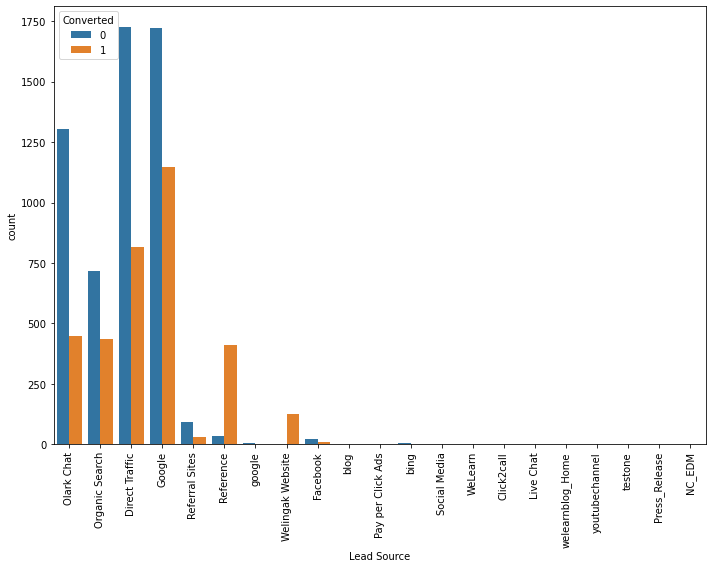

In [41]:
#visualizing Lead Source
count_plt("Lead Source")

##### Highest conversions are coming from Google

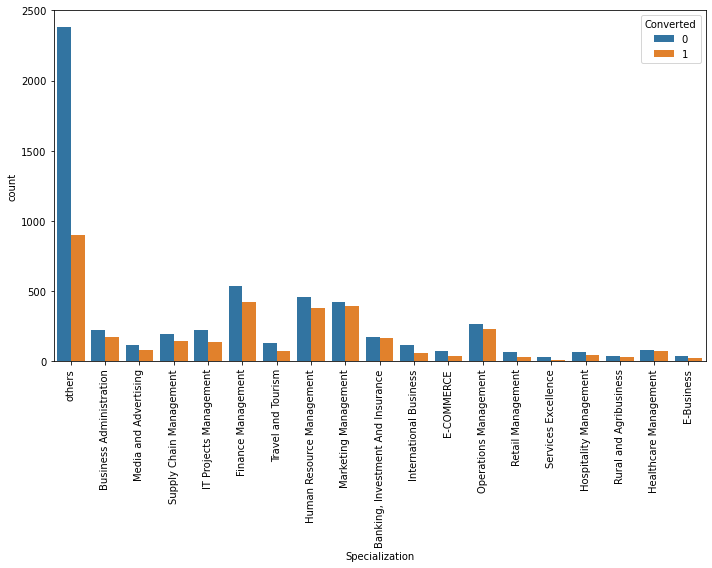

In [42]:
#visualizing Specializations
count_plt("Specialization")

##### The ratio of conversion in the 'others' category looks poor. Marketing Management and Operations Management show good conversion rates.

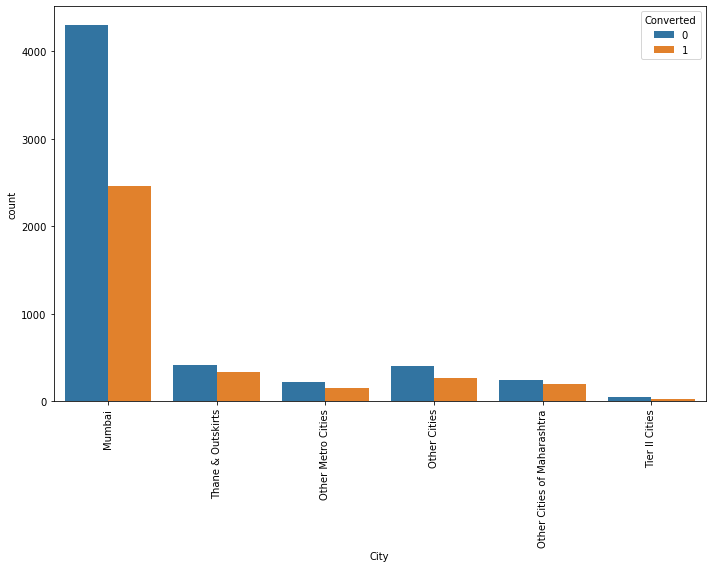

In [43]:
#visualizing City
count_plt("City")

##### Mumbai has the highest traffic as well as conversions amongst the cities.

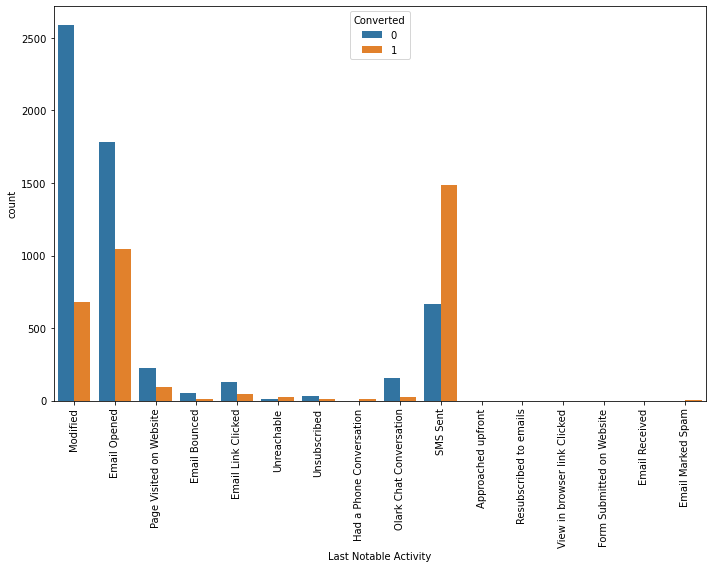

In [44]:
#visualizing Last Notable Activity
count_plt("Last Notable Activity")

##### It is observed that the "SMS Sent" category for Last Notable Activity has more positive conversions than people dropping out.

#### Numerical variable analysis

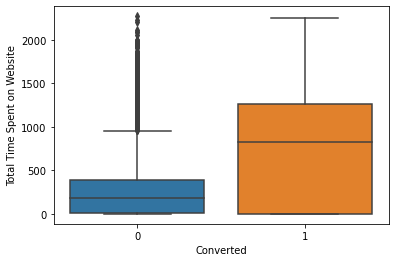

In [45]:
sns.boxplot(y='Total Time Spent on Website',x="Converted", data=lead_df)
plt.show()

<p style= "background:pink"> &#9654; <font color ="darkblue"> Larger the time spent by the leads on the website, the likelier they are to be converted.

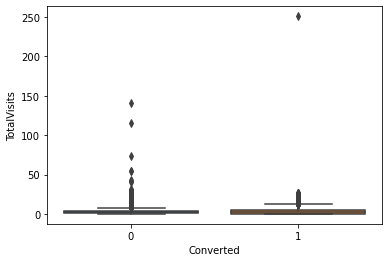

In [46]:
sns.boxplot(y='TotalVisits',x="Converted", data=lead_df)
plt.show()

<p style= "background:pink"> &#9654; <font color ="darkblue"> We don't see much of a difference in the number of visits between Converted and non-Converted

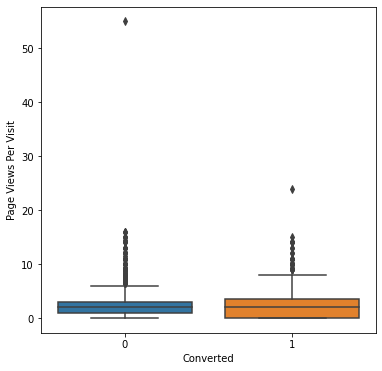

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(y='Page Views Per Visit',x="Converted",data=lead_df)
plt.show()

<p style= "background:pink"> &#9654; <font color ="darkblue"> The median page views per visit is similar for both the categories, with a slight difference in overall total visits.

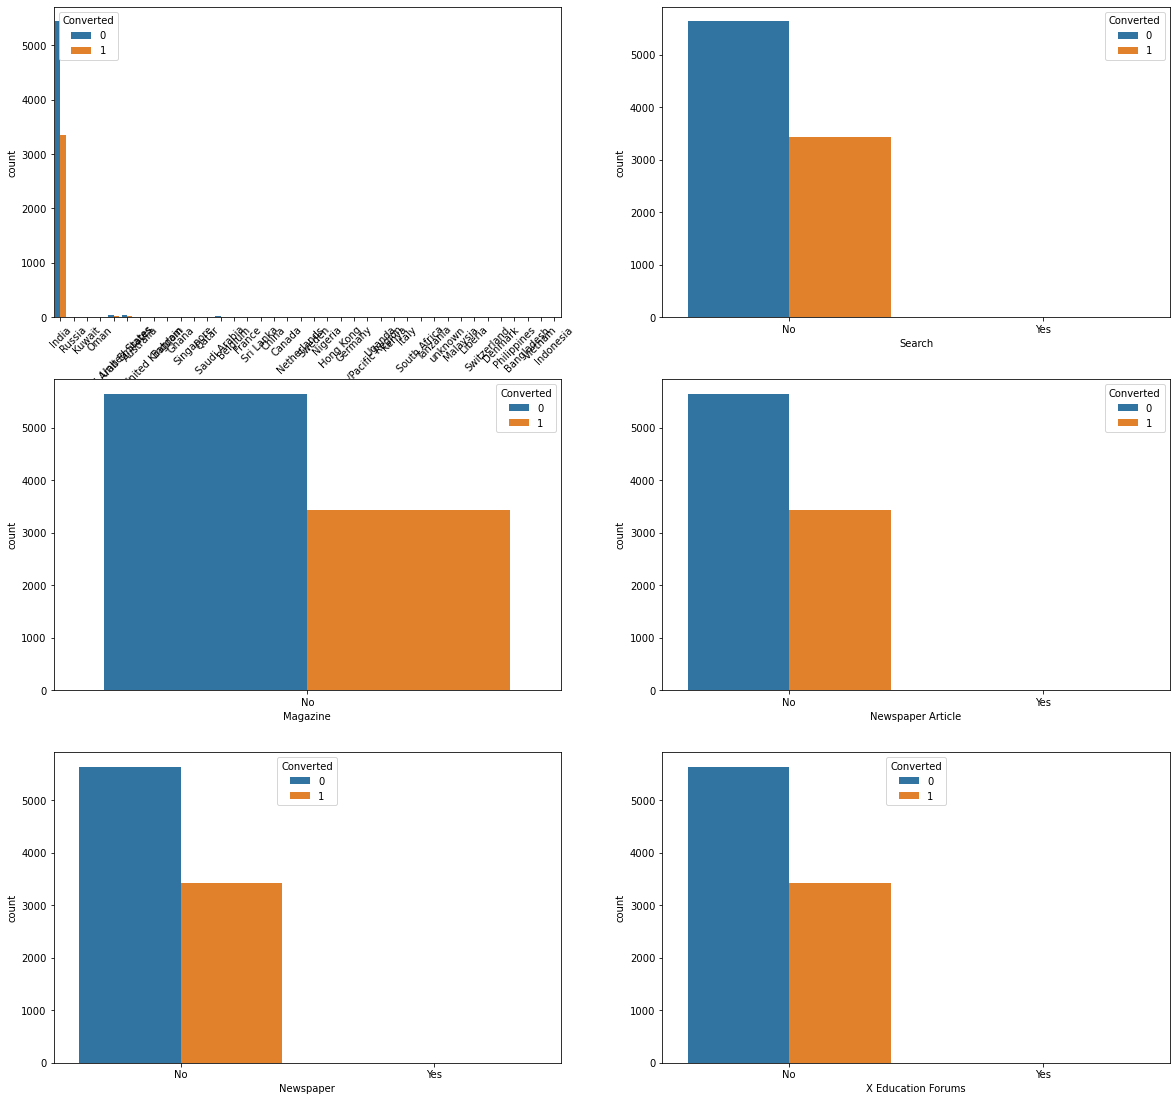

In [48]:
#checking the variable of the dataset and trying to make some reference from  it 
plt.figure(figsize =(20,40))
plt.subplot(6,2,1)
sns.countplot(x='Country',hue="Converted", data=lead_df)
plt.xticks(rotation=45)
plt.subplot(6,2,2)
sns.countplot(x='Search',hue="Converted",data=lead_df)
plt.subplot(6,2,3)
sns.countplot(x='Magazine',hue="Converted",data=lead_df)
plt.subplot(6,2,4)
sns.countplot(x='Newspaper Article',hue="Converted",data=lead_df)
plt.subplot(6,2,5)
sns.countplot(x='Newspaper',hue="Converted",data=lead_df)
plt.subplot(6,2,6)
sns.countplot(x='X Education Forums',hue="Converted",data=lead_df)
plt.show()

<p style= "background:pink"> &#9654; <font color ="darkblue"> the variables selected above are highly skewed and would not be helpgul for deriving insights for our end objective. We can drop these variables.

In [49]:
lead_df.shape

(9074, 26)

In [50]:
lead_df.drop(['Country','Newspaper','Search','Magazine','X Education Forums', 'Newspaper Article'],axis=1,inplace=True)

In [51]:
lead_df.shape

(9074, 20)

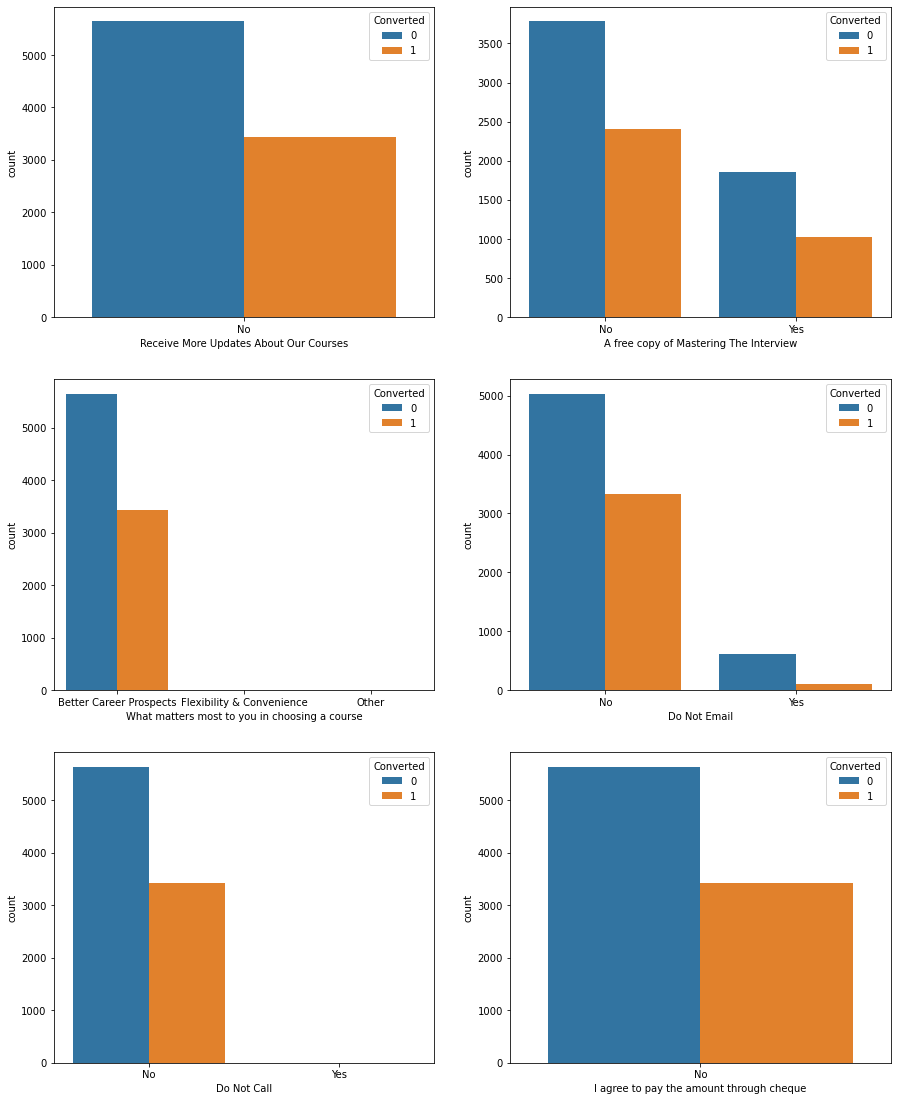

In [52]:
#checking variables of the dataset and trying to analyse it 
plt.figure(figsize =(15,40))
plt.subplot(6,2,1)
sns.countplot(x='Receive More Updates About Our Courses',hue="Converted", data=lead_df)
plt.subplot(6,2,2)
sns.countplot(x='A free copy of Mastering The Interview',hue="Converted",data=lead_df)
plt.subplot(6,2,3)
sns.countplot(x='What matters most to you in choosing a course',hue="Converted",data=lead_df)
plt.subplot(6,2,4)
sns.countplot(x='Do Not Email',hue="Converted",data=lead_df)
plt.subplot(6,2,5)
sns.countplot(x='Do Not Call',hue="Converted",data=lead_df)
plt.subplot(6,2,6)
sns.countplot(x='I agree to pay the amount through cheque',hue="Converted",data=lead_df)
plt.show()

<p style= "background:pink"> &#9654; <font color ="darkblue"> Some of the variables selected above are highly skewed and some would not be helpful for deriving insights for our end objective. We can drop these variables.

In [53]:
## Checking the data in variable showing both categories and deciding if they can be dropped
lead_df["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

###### This can definitely be dropped as it is very highly skewed

In [54]:
## Checking the data in variable showing both categories and deciding if they can be dropped
lead_df["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [55]:
lead_df.shape

(9074, 20)

In [56]:
#dropping the variables
lead_df.drop(['Receive More Updates About Our Courses','What matters most to you in choosing a course','Do Not Call', 'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [57]:
lead_df.shape

(9074, 16)

In [58]:
#checking the columns after dropping the irrelevant columns
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,others,Unemployed,No,No,No,No,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,others,Unemployed,No,No,No,No,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,others,Unemployed,No,No,No,No,Mumbai,No,Modified


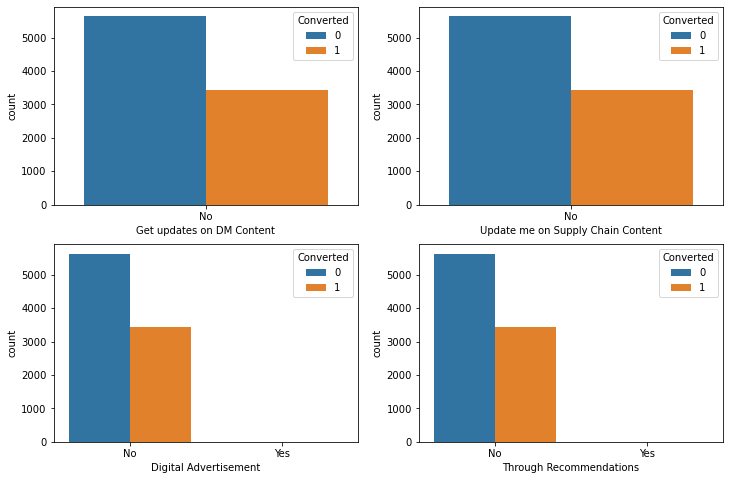

In [59]:
#checking few more variables of the dataset and trying to analyse it 
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
sns.countplot(x='Get updates on DM Content',hue="Converted", data=lead_df)
plt.subplot(2,2,2)
sns.countplot(x='Update me on Supply Chain Content',hue="Converted",data=lead_df)
plt.subplot(2,2,3)
sns.countplot(x='Digital Advertisement',hue="Converted", data=lead_df)
plt.subplot(2,2,4)
sns.countplot(x='Through Recommendations',hue="Converted",data=lead_df)

<p style= "background:pink"> &#9654; <font color ="darkblue"> Some of the variables selected above are highly skewed and some would not be helpful for deriving insights for our end objective. We can drop these variables.

In [60]:
## Checking the data in variable showing both categories and deciding if they can be dropped
lead_df["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

###### This can definitely be dropped as it is very highly skewed

In [61]:
## Checking the data in variable showing both categories and deciding if they can be dropped
lead_df["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

###### This can definitely be dropped as it is very highly skewed

In [62]:
#dropping the variables
lead_df.drop(["Get updates on DM Content", "Update me on Supply Chain Content", "Digital Advertisement", "Through Recommendations"],axis=1, inplace=True)

In [63]:
#checking the shape of the final cleaned dataset
lead_df.shape

(9074, 12)

### Correlation

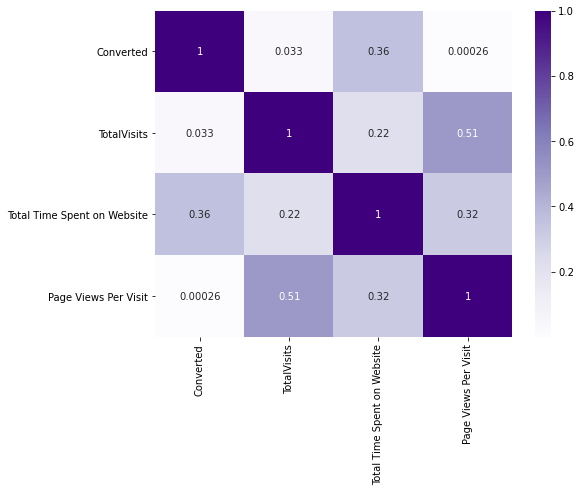

In [64]:
# Let's check the correlation coefficients of the  variables 
plt.figure(figsize = (8, 6))
sns.heatmap(lead_df.corr(), annot = True, cmap="Purples")
plt.show()

##### We note that the Total Time Spent on Website has a good correlation with Converted variable. 

## Outlier Analysis and treatment

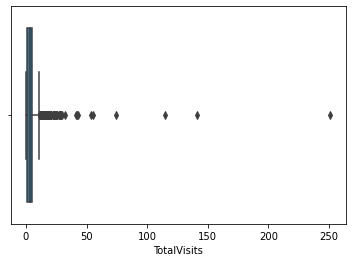

In [65]:
#checkign the variable and treating the outlier
sns.boxplot(lead_df['TotalVisits'])

###### <p style= "background:pink"> &#9654; <font color ="darkblue"> We see there are a few outliers in the variable, let's treat them by capping the varibale at 95th percentile

In [66]:
Q4=lead_df.TotalVisits.quantile(0.95)

#statistical treatment for the outliers
lead_df['TotalVisits'][lead_df['TotalVisits']>=Q4]=Q4

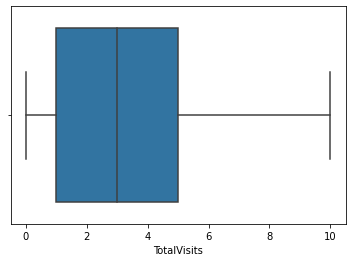

In [67]:
#checking the feature again
sns.boxplot(lead_df['TotalVisits'])

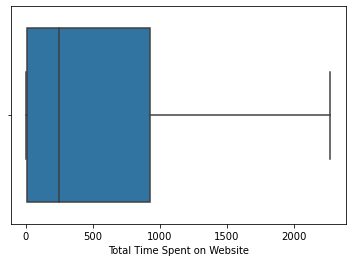

In [68]:
#checking the outlier
sns.boxplot(lead_df['Total Time Spent on Website'])

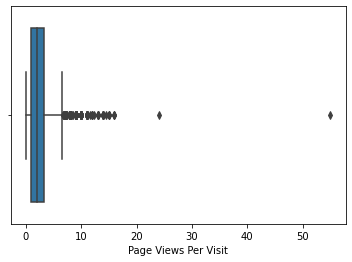

In [69]:
#checking the outlier
sns.boxplot(lead_df['Page Views Per Visit'])

###### <p style= "background:pink"> &#9654; <font color ="darkblue"> We see there are a few outliers in the variable, let's treat them by capping the variable at 95th percentile

In [70]:
#capping the outlier
Q4=lead_df["Page Views Per Visit"].quantile(0.95)

#statistical treatment for the outliers
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit']>=Q4]=Q4

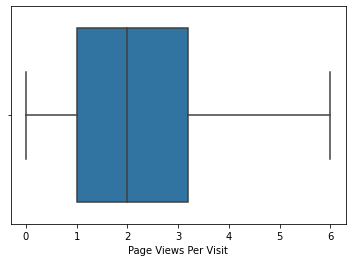

In [71]:
#checking again the outliers 
sns.boxplot(lead_df['Page Views Per Visit'])

## Data Preparation

In [72]:
#checking the dataset 
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,others,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,others,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,others,Unemployed,Mumbai,No,Modified


#####  Converting the binary variables to 0/1

In [73]:
#list of variables to be mapped
var=["Do Not Email","A free copy of Mastering The Interview"]

In [74]:
#defining function for binary conversion
def map_df(x):
    return x.map({'Yes':1,'No':0})

In [75]:
#applying binary function on the variables 
lead_df[var]=lead_df[var].apply(map_df)

In [76]:
lead_df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,Email Opened


##### For categorical variables with multiple levels, let's create dummy variables

In [77]:
#creating the dummy variable for the categorical variables and drop the first one 
dummy1=pd.get_dummies(lead_df[["Lead Origin","Lead Source","Last Notable Activity","City","Specialization","What is your current occupation"]],drop_first=True)

In [78]:
#concat the dummy data and the dataset
lead_df=pd.concat([lead_df,dummy1],axis=1)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,others,Unemployed,Mumbai,...,0,0,0,0,1,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,others,Unemployed,Mumbai,...,0,0,0,0,1,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,others,Unemployed,Mumbai,...,0,0,0,0,1,0,0,0,1,0


In [79]:
#we need to drop  the original variables to avoid redundancy
lead_df.drop(["Lead Origin","Lead Source","Last Notable Activity","City","Specialization","What is your current occupation"],axis=1, inplace = True)

In [80]:
#check the shape
lead_df.shape

(9074, 72)

In [81]:
#checking the dataset
lead_df.head(3)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


***

## Model Building

### Selecting the test and train datasets

In [82]:
#importing the library for the test train split 
from sklearn.model_selection import train_test_split

In [83]:
#splitting the data into test and train data
df_train , df_test = train_test_split(lead_df, train_size=0.7,random_state=100)

### Scaling necessary variables

In [84]:
#importing the library
from sklearn.preprocessing import MinMaxScaler

In [85]:
Scaler=MinMaxScaler()

var = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
#Scaling the variables
df_train[var]=Scaler.fit_transform(df_train[var])
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,0.2,0.178347,0.333333,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1012,1,0,0.2,0.085355,0.333333,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4750,0,1,0.2,0.619946,0.333333,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7987,0,1,0.5,0.711590,0.416667,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [86]:
#checking the conversion rate for the leads
convert=(sum(lead_df["Converted"])/len(lead_df["Converted"]))*100
convert

37.85541106458012

##### Checking the correlation 

In [87]:
#let's see the top correlation in a tablular format as there are too many variables to check it graphically in a heatmap
c = df_train.corr().unstack().drop_duplicates().sort_values(ascending=False).apply(lambda x: round(x,2))
c.head(10)

Do Not Email                            Do Not Email                           1.00
Lead Origin_Lead Import                 Lead Source_Facebook                   0.98
Lead Origin_Lead Add Form               Lead Source_Reference                  0.86
TotalVisits                             Page Views Per Visit                   0.77
A free copy of Mastering The Interview  Lead Source_Direct Traffic             0.59
                                        Lead Origin_Landing Page Submission    0.56
Page Views Per Visit                    Lead Origin_Landing Page Submission    0.55
Lead Origin_Landing Page Submission     Lead Source_Direct Traffic             0.52
Lead Source_Olark Chat                  Specialization_others                  0.51
Lead Origin_Lead Add Form               Lead Source_Welingak Website           0.47
dtype: float64

### Dividing into X and Y sets

In [88]:
#putting the independent features to X_train
X_train= df_train.drop(["Converted"], axis =1)

In [89]:
#checking the dataset 
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0.2,0.178347,0.333333,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,0.2,0.085355,0.333333,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
9226,0,0.0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4750,0,0.2,0.619946,0.333333,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0.5,0.711590,0.416667,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
#putting the dependent variable to y_train
y_train= df_train["Converted"]
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

## Build a Model

In [91]:
#importing libraries
import statsmodels.api as sm

In [92]:
#logistic regression model
mod=sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Oct 2020   Deviance:                          nan
Time:                        21:35:40   Pearson chi2:                 7.10e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.912e+15   9.53e+07  -2.01e+07      0.000   -1.91e+15   -1.91e+15
Do Not Email                                         -9.013e+14   3.55e+06  -2.54e+08      0.000   -9.01e+14   -9.01e+14
TotalVisits                                            6.96e+14   5.13e+06   1.36e+08      0.000    6.96e+14    6.96e+14
Total Time Spent on Website                           2.997e+15   4.01e+06   7.47e+08      0.000       3e+15       3e+15
Page Views Per Visit                                  -5.79e+14   5.22e+06  -1.11e+08      0.000   -5.79e+14   -5.79e+14
A free copy of Mastering The Interview               -1.183e+14    2.7e+06  -4.38e+07      0.000   -1.18e+14   -1.18e+14
Lead Origin_Landing Page Submission                    2.39e+14   3.36e+06    7.1e+07      0.000    2.39e+14    2.39e+14
Lead Origin_Lead Add Form                            -3.418e+14   4.75e+07  -7.19e+06      0.000   -3.42e+14   -3.42e+14
Lead Origin_Lead Import                               2.602e+15    6.9e+07   3.77e+07      0.000     2.6e+15     2.6e+15
Lead Source_Direct Traffic                           -9.357e+14   6.15e+07  -1.52e+07      0.000   -9.36e+14   -9.36e+14
Lead Source_Facebook                                 -4.485e+15   9.14e+07  -4.91e+07      0.000   -4.48e+15   -4.48e+15
Lead Source_Google                                   -8.002e+14   6.15e+07   -1.3e+07      0.000      -8e+14      -8e+14
Lead Source_Live Chat                                 5.613e+15   6.14e+07   9.14e+07      0.000    5.61e+15    5.61e+15
Lead Source_NC_EDM                                    2.768e+15   9.11e+07   3.04e+07      0.000    2.77e+15    2.77e+15
Lead Source_Olark Chat                               -7.533e+14   6.14e+07  -1.23e+07      0.000   -7.53e+14   -7.53e+14
Lead Source_Organic Search                           -8.456e+14   6.15e+07  -1.37e+07      0.000   -8.46e+14   -8.46e+14
Lead Source_Pay per Click Ads                        -4.851e+15   9.11e+07  -5.32e+07      0.000   -4.85e+15   -4.85e+15
Lead Source_Press_Release                            -5.526e+15   9.14e+07  -6.05e+07      0.000   -5.53e+15   -5.53e+15
Lead Source_Reference                                  1.63e+15    3.9e+07   4.18e+07      0.000    1.63e+15    1.63e+15
Lead Source_Referral Sites                            -1.03e+15   6.19e+07  -1.66e+07      0.000   -1.03e+15   -1.03e+15
Lead Source_Social Media                             -8.407e+14   7.77e+07  -1.08e+07      0.000   -8.41e+14   -8.41e+14
Lead Source_WeLearn                                    -27.8382   6.85e-07  -4.06e+07      0.000     -27.838     -27.838
Lead Source_Welingak Website                          1.79

##### There are a lot of varibales, let's select the important variables using RFE

### Feature selection with the RFE

In [93]:
#instantiating
logreg = LogisticRegression()

#using RFE to select 15 most important variables
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_WeLearn', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 21),
 ('Lead Source_google', False, 20),
 ('L

In [95]:
#checking the columns supported by the RFE
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Specialization_others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [96]:
#checking the variables not supported by the rfe
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notabl

##### <p style= "background:pink"> &#9654; <font color ="darkblue"> Let's build the model with the above RFE  selected variables

### Model 1

In [97]:
X_train_sm=sm.add_constant(X_train[col])

In [98]:
mod1=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res= mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.3
Date:                Mon, 26 Oct 2020   Deviance:                       5314.7
Time:                        21:35:44   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4535      0.134    -10.864      0.000      -1.716      -1.191
Do Not Email                                            -1.7190      0.187     -9.210      0.000      -2.085      -1.353
Total Time Spent on Website                              4.5217      0.165     27.366      0.000       4.198       4.846
Lead Origin_Landing Page Submission                     -1.0877      0.127     -8.542      0.000      -1.337      -0.838
Lead Origin_Lead Add Form                                1.6006      0.891      1.797      0.072      -0.145       3.346
Lead Origin_Lead Import                                  1.1795      0.478      2.465      0.014       0.242       2.117
Lead Source_Olark Chat                                   0.9441      0.119      7.939      0.000       0.711       1.177
Lead Source_Reference                                    1.9362      0.915      2.116      0.034       0.143       3.730
Lead Source_Welingak Website                             4.5730      1.150      3.977      0.000       2.319       6.827
Last Notable Activity_Had a Phone Conversation           3.5611      1.099      3.241      0.001       1.407       5.715
Last Notable Activity_SMS Sent                           1.7906      0.079     22.550      0.000       1.635       1.946
Last Notable Activity_Unreachable                        1.9110      0.474      4.033      0.000       0.982       2.840
Last Notable Activity_Unsubscribed                       1.8244      0.527      3.465      0.001       0.792       2.856
Specialization_others                                   -1.2336      0.123    -10.011      0.000      -1.475      -0.992
What is your current occupation_Housewife               22.9879   1.51e+04      0.002      0.999   -2.95e+04    2.95e+04
What is your current occupation_Working Professional     2.6329      0.194     13.551      0.000       2.252       3.014
========================================================================================================================
"""

In [99]:
#dropping the variable with very high p-value
col2=col.drop("What is your current occupation_Housewife",1)

### Model 2

In [100]:
X_train_sm2=sm.add_constant(X_train[col2])

In [101]:
mod2=sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial())
res= mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.0
Date:                Mon, 26 Oct 2020   Deviance:                       5324.1
Time:                        21:35:44   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4464      0.134    -10.825      0.000      -1.708      -1.184
Do Not Email                                            -1.7223      0.187     -9.229      0.000      -2.088      -1.357
Total Time Spent on Website                              4.5186      0.165     27.380      0.000       4.195       4.842
Lead Origin_Landing Page Submission                     -1.0879      0.127     -8.555      0.000      -1.337      -0.839
Lead Origin_Lead Add Form                                1.5974      0.890      1.794      0.073      -0.148       3.343
Lead Origin_Lead Import                                  1.1747      0.478      2.455      0.014       0.237       2.112
Lead Source_Olark Chat                                   0.9425      0.119      7.929      0.000       0.710       1.175
Lead Source_Reference                                    1.9521      0.915      2.134      0.033       0.159       3.745
Lead Source_Welingak Website                             4.5757      1.150      3.980      0.000       2.322       6.829
Last Notable Activity_Had a Phone Conversation           3.5546      1.099      3.235      0.001       1.401       5.708
Last Notable Activity_SMS Sent                           1.7862      0.079     22.506      0.000       1.631       1.942
Last Notable Activity_Unreachable                        1.9063      0.474      4.023      0.000       0.978       2.835
Last Notable Activity_Unsubscribed                       1.8236      0.526      3.464      0.001       0.792       2.855
Specialization_others                                   -1.2386      0.123    -10.061      0.000      -1.480      -0.997
What is your current occupation_Working Professional     2.6280      0.194     13.527      0.000       2.247       3.009
========================================================================================================================
"""

In [102]:
#drop the variable with the high p-value
col3=col2.drop("Lead Origin_Lead Add Form",1)

### Model 3

In [103]:
X_train_sm3=sm.add_constant(X_train[col3])

mod3=sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial())
res= mod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.8
Date:                Mon, 26 Oct 2020   Deviance:                       5327.6
Time:                        21:35:44   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4240      0.133    -10.703      0.000      -1.685      -1.163
Do Not Email                                            -1.7241      0.187     -9.238      0.000      -2.090      -1.358
Total Time Spent on Website                              4.5093      0.165     27.370      0.000       4.186       4.832
Lead Origin_Landing Page Submission                     -1.1073      0.127     -8.729      0.000      -1.356      -0.859
Lead Origin_Lead Import                                  1.1573      0.479      2.418      0.016       0.219       2.095
Lead Source_Olark Chat                                   0.9344      0.119      7.877      0.000       0.702       1.167
Lead Source_Reference                                    3.5340      0.243     14.518      0.000       3.057       4.011
Lead Source_Welingak Website                             6.1637      0.734      8.397      0.000       4.725       7.602
Last Notable Activity_Had a Phone Conversation           3.5502      1.099      3.230      0.001       1.396       5.704
Last Notable Activity_SMS Sent                           1.7876      0.079     22.523      0.000       1.632       1.943
Last Notable Activity_Unreachable                        1.9022      0.474      4.014      0.000       0.973       2.831
Last Notable Activity_Unsubscribed                       1.8227      0.526      3.463      0.001       0.791       2.854
Specialization_others                                   -1.2517      0.123    -10.178      0.000      -1.493      -1.011
What is your current occupation_Working Professional     2.6250      0.194     13.506      0.000       2.244       3.006
========================================================================================================================
"""

In [104]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm3).values.reshape(-1)
y_train_pred[:10]

array([0.15096615, 0.07605028, 0.1491371 , 0.88613761, 0.66318109,
       0.77724638, 0.07425066, 0.96913537, 0.8139134 , 0.62275629])

In [105]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.150966,3009
1,0,0.076050,1012
2,0,0.149137,9226
3,1,0.886138,4750
4,1,0.663181,7987


In [106]:
y_train_pred_final['predicted'] = y_train_pred

In [107]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.predicted.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.150966,3009,0
1,0,0.076050,1012,0
2,0,0.149137,9226,0
3,1,0.886138,4750,1
4,1,0.663181,7987,1


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.812627932609038


### Checking VIF

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_others,2.03
1,Total Time Spent on Website,2.00
2,Lead Origin_Landing Page Submission,1.91
4,Lead Source_Olark Chat,1.77
8,Last Notable Activity_SMS Sent,1.40
12,What is your current occupation_Working Profes...,1.20
0,Do Not Email,1.17
5,Lead Source_Reference,1.16
6,Lead Source_Welingak Website,1.08
10,Last Notable Activity_Unsubscribed,1.06


##### <p style= "background:lightblue"> &#9654; <font color ="darkblue"> All variables have a good value of vif. So  we need not drop any more variables and we can proceed with making predictions using this model. This will be our FINAL MODEL (mod3).

***

### Confusion matrix

In [110]:
#confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3459  446]
 [ 744 1702]]


In [111]:
#predicted     not_converted  converted
#actual
#not_converted     3459      446
#converted         744       1702

In [112]:
#we will check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.812627932609038


## Metrics beyond accuracy

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Precision
TP/TP+FP

In [114]:
#CHECKING THE PRECISION
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.792364990689013

#### Recall / Sensitivity
TP/TP+FN

In [115]:
#CHECKING THE RECALL
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.695829926410466

In [116]:
#sensitivity of our logistic model
TP/float(TP+FN)

0.695829926410466

#### Specificity

In [117]:
#lest calculate the specificity
TN/float(TN+FP)

0.885787451984635

In [118]:
#lets calculate the false positive rate -predicting churn where customer does not have chuned
print(FP/float(TN+FP))

0.11421254801536491


In [119]:
#positive predicted value
print(TP/float(TP+FP))

0.792364990689013


In [120]:
#negative predicted value
print(TN/float(TN+FN))

0.8229835831548894


## Plotting ROC Curve

An ROC curve demonstrates several things: *It shows the trade off between sensitivity and specificity(any increase in the sensitivity will be accompanied by a decrease in specificity). *The closer the curve follows the left-hand border and then the top border of the ROC space,the more accurate the test. **The closer the curve comes to the 45 degree diagonal of the ROC space the less accurate the test.

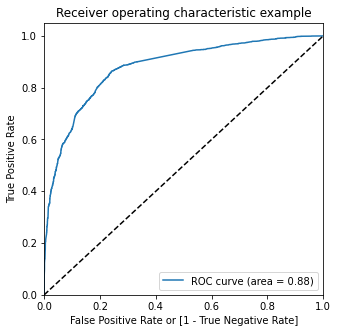

In [121]:
#Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding the optimal cutoff point

##### Optimal porbability is that probability that balances both sensitivity and specificity

In [122]:
number =[float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i]=y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.150966,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.076050,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.149137,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.886138,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.663181,7987,1,1,1,1,1,1,1,1,0,0,0


In [123]:
#Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.553456  0.973017  0.290653
0.2   0.2  0.784601  0.882257  0.723431
0.3   0.3  0.798772  0.848733  0.767478
0.4   0.4  0.805857  0.768602  0.829193
0.5   0.5  0.812628  0.695830  0.885787
0.6   0.6  0.797040  0.587081  0.928553
0.7   0.7  0.785073  0.520850  0.950576
0.8   0.8  0.760195  0.426002  0.969526
0.9   0.9  0.715950  0.280867  0.988476


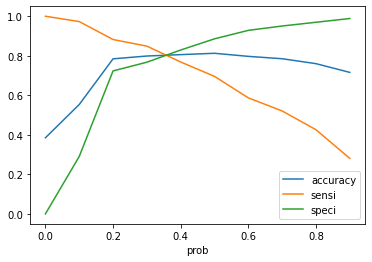

In [124]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [125]:
# Creating new column 'predicted_leadscore' with 1 if Converted_Prob > 0.35 else 0
y_train_pred_final['predicted_leadscore'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore
0,0,0.150966,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.076050,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.149137,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.886138,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.663181,7987,1,1,1,1,1,1,1,1,0,0,0,1


#### Lead score 

In [126]:
# Creating new column 'lead_score' with 1 if Converted_Prob > 0.35 else 0
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_prob.map(lambda x: round((x*100),2))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore,lead_score
0,0,0.150966,3009,0,1,1,0,0,0,0,0,0,0,0,0,15.10
1,0,0.076050,1012,0,1,0,0,0,0,0,0,0,0,0,0,7.61
2,0,0.149137,9226,0,1,1,0,0,0,0,0,0,0,0,0,14.91
3,1,0.886138,4750,1,1,1,1,1,1,1,1,1,1,0,1,88.61
4,1,0.663181,7987,1,1,1,1,1,1,1,1,0,0,0,1,66.32


In [127]:
#lets check the accuracy 
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted_leadscore)

0.8039678790741616

##### The overall accuracy have not dropped much, it is the same 

In [128]:
#after having a cutoff of 0.35 - checking the confusion matrix
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted_leadscore)
print(confusion2)

[[3103  802]
 [ 443 2003]]


In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
#approx sensitivity of the model 
#lets see the sensitivity of our logistic model
TP/float(TP+FN)

0.8188879803761243

In [131]:
#Recall
Recall=TP/float(TP+FN)
Recall

0.8188879803761243

In [132]:
#Precision
Precision=TP/float(TP+FP)
Precision

0.7140819964349376

In [133]:
#Calculating the F1 score
F1 = 2*((Precision*Recall)/(Precision+Recall))
F1

0.7629023043229862

#### Precision and recall tradeoff

In [134]:
#importing libraries
from sklearn.metrics import precision_recall_curve

In [135]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

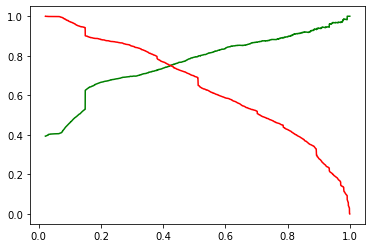

In [136]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [137]:
# Looing at the curve intersection above, creating new column 'final_predicted' with 1 if Converted_Prob > 0.41 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore,lead_score,final_predicted
0,0,0.150966,3009,0,1,1,0,0,0,0,0,0,0,0,0,15.10,0
1,0,0.076050,1012,0,1,0,0,0,0,0,0,0,0,0,0,7.61,0
2,0,0.149137,9226,0,1,1,0,0,0,0,0,0,0,0,0,14.91,0
3,1,0.886138,4750,1,1,1,1,1,1,1,1,1,1,0,1,88.61,1
4,1,0.663181,7987,1,1,1,1,1,1,1,1,0,0,0,1,66.32,1


In [138]:
#lets check the accuracy 
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8061722563375846

In [139]:
# confusion matrix after having a cutoff of 0.41
confusion3=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion3)

[[3258  647]
 [ 584 1862]]


In [140]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [141]:
#approx sensitivity of the model 
#lets see the sensitivity of our logistic model
TP/float(TP+FN)

0.7612428454619787

<p style= "background:pink"> &#9654; <font color ="darkblue"> <b> From the precision-recall graph above, we get the optical threshold value as close to 0.41. However our business requirement here is to have Lead Conversion Rate of around 80%.
This is already achieved with our earlier threshold value of 0.35. So we will stick to this value to achieve the business objective.

## Making prediction on test set

In [142]:
X_test = df_test.drop(["Converted"],axis=1)
y_test = df_test["Converted"]

In [143]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=Scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [144]:
X_test=X_test[col3]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Specialization_others,What is your current occupation_Working Professional
3271,0,0.070530,0,0,0,0,0,0,0,0,0,1,0
1490,0,0.679695,1,0,0,0,0,0,0,0,0,0,1
7936,0,0.033243,0,0,0,0,0,0,0,0,0,1,0
4216,0,0.000000,0,0,0,1,0,0,0,0,0,0,0
3830,0,0.073675,1,0,0,0,0,0,0,0,0,0,0


In [145]:
#adding a constant here in test set
X_test_sm=sm.add_constant(X_test)
y_test_pred=res.predict(X_test_sm)

In [146]:
#converting y_test_pred (array) to dataframe
y_pred_1=pd.DataFrame(y_test_pred)

In [147]:
#lets analyze the dataset
y_pred_1.head()

,0
3271,0.086455
1490,0.959249
7936,0.074066
4216,0.891870
3830,0.099837


In [148]:
#converting y test into dataframe
y_test_df=pd.DataFrame(y_test)

In [149]:
#putting the custom id to index
y_test_df['Prospect ID']=y_test_df.index

In [150]:
#removing index from both the dataframe to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [151]:
#appending y_pred_1 and y_test_df
y_pred_final=pd.concat([y_pred_1,y_test_df],axis=1)
y_pred_final.head()

,0,Converted,Prospect ID
0,0.086455,0,3271
1,0.959249,1,1490
2,0.074066,0,7936
3,0.891870,1,4216
4,0.099837,0,3830


In [152]:
#renaming the column
y_pred_final=y_pred_final.rename(columns={0:"Converted_prob"})

In [153]:
#rearranging the column
y_pred_final=y_pred_final.reindex(columns=["Prospect ID","Converted","Converted_prob"])

In [154]:
#giving the cutoff value 0.35 on churnprob
y_pred_final['final_predicted']=y_pred_final.Converted_prob.map(lambda x: 1 if x>0.35 else 0)

In [155]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.086455,0
1,1490,1,0.959249,1
2,7936,0,0.074066,0
3,4216,1,0.891870,1
4,3830,0,0.099837,0


In [156]:
#lets check the accuracy
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.7976496511200881

In [157]:
#confusion matrix after having a cutoff of 0.35
confusion4=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
print(confusion4)

[[1372  362]
 [ 189  800]]


In [158]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [159]:
#lets see the sensitivity of our logistic model
TP/float(TP+FN)

0.8088978766430738

In [160]:
#lets calculate the specificity
TN/float(TN+FP)

0.7912341407151096

In [161]:
# Precision = TP / TP + FP
Precision=TP / (TP + FP)
Precision

0.6884681583476764

In [162]:
#Recall
Recall=TP/float(TP+FN)
Recall

0.8088978766430738

In [163]:
# Calculating the F1 score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7438400743840075

***

### Final Metrics


##### <span style= "background:pink"> &#9654; <font color ="darkblue"> <b> Train Set: </b>
**Overall Accuracy:  80.40%**

**Sensitivity / Recall : 81.89%**

**Precision: 71.41%***


##### <span style= "background:pink"> &#9654; <font color ="darkblue"> <b> Test Set: </b>
**Overall Accuracy:  79.76%**

**Sensitivity / Recall : 80.89%**

**Precision: 68.85%***

***

## Interpretations

<span style= "background:pink"> &#9654; <font color ="darkblue"> <b> NOTE : </b> The following features have a high impact on the lead conversion and business should focus on these:
   1. Lead Source being Welingak website - this source generates a lot of traffic and leads to more business 
   2. Total time spent on the website  - the website UI should be made more engaging so that the leads spend more time.
   3. When the last notable activity was a having a phone conversation
   4. Through reference - Business can create some reference incentives to further increase the referrals.
   5. People who have their current occupation as Working professional should be focussed more on.
   6. When the last notable activity was SMS sent  
   7. When the last notable activity was Unreachable
   8. When the last notable activity was Unsubscribed
   9. When the lead origin is through Lead import  - Business should focus more on how to get more imports.
   10. Olark Chat is a good source of leads - Business should focus on Olark chat promotions.
   11. When the leads ask to not Email - this creates a negative impact on Lead conversion - Business should see how to motivate the leads to accept emails.
   12. When the lead origin is Landing Page Submission - the impact is negative on lead conversions
   13. When the specialization is not selected the impact is negative on the lead conversions.
    

***